E

# Importing the libraries

In [2]:
# reading in data
import re
import string
import numpy as np 
import random
import pandas as pd 

#Vissualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go # pip install plotly==4.8.1
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator #pip install wordcloud

#Preprocessing
import nltk
from nltk.corpus import stopwords
from tqdm import tqdm
import os
import nltk
nltk.download('averaged_perceptron_tagger')
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch

#modeling
from sklearn.feature_extraction.text import CountVectorizer

#csv paths
import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\elton\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Below is a helper Function which generates random colors which will be used to give different colors to our plots.

In [3]:
def random_colours(number_of_colors):
    '''
    Simple function for random colours generation.
    Input:
        number_of_colors - integer value indicating the number of colours which are going to be generated.
    Output:
        Color in the following format: ['#E86DA4'] .
    '''
    colors = []
    for i in range(number_of_colors):
        colors.append("#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))
    return colors

# Getting Data

In [4]:
# Load dataset
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
ss_df = pd.read_csv('sample_submission.csv')

In [4]:
train_df.head()

sentiment                                            message  tweetid
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221
1          1  It's not like we lack evidence of anthropogeni...   126103
2          2  RT @RawStory: Researchers say we have three ye...   698562
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954

In [5]:
print('___basic info of the train data___')
print(train_df.info())
print('Dataset size:', train_df.shape)
print('Columns are:',train_df.columns)

print('___Print the head/Tain of the train data_____')
print(train_df.head())
print('________________________')
print(train_df.tail())

___basic info of the train data___
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB
None
Dataset size: (15819, 3)
Columns are: Index(['sentiment', 'message', 'tweetid'], dtype='object')
___Print the head/Tain of the train data_____
   sentiment                                            message  tweetid
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221
1          1  It's not like we lack evidence of anthropogeni...   126103
2          2  RT @RawStory: Researchers say we have three ye...   698562
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954
________________________

As seen above, when we print some basic information about the data. We can notice right away how each row is represented either by int64 or Object (for TextData). Finally after plotting the histogram of the sentiment data, its clear that there more positive examples then negative examples. (1 being denoted as positive sentiment while 0 being denoted as negative.). There are four sentiments in total.

# Data cleaning and Preprocessing

## Removing the noise

Replacing contaction phrases 

In [6]:
contractions_dict = contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}


def expand_contractions(text):
    for word in text.split():
        if word.lower() in contractions_dict:
            text = text.replace(word,contractions_dict[word.lower()])
    return text

train_df['fixed_cntractions'] = train_df['message'].apply(lambda x: expand_contractions(x))
test_df['fixed_cntractions'] = test_df['message'].apply(lambda x: expand_contractions(x))

### Dealig with the punctuations and the links present in the messages

In [7]:
def remov_pnct(text):
    '''The Function makes text lowercase,removes links, punctuation(!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~)
    and words containing numbers.'''
    
    text = str(text).lower() #Make text lowercase
    text = ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())# remove @user, #word and link
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) ##remove punctuation
    text = re.sub('\n', '', text)
    text = ''.join([i for i in text[:] if not i.isdigit()]) #remove numbers
    return text

train_df['clean_message'] = train_df['fixed_cntractions'].apply(lambda x: remov_pnct(x))
test_df['clean_message'] = test_df['fixed_cntractions'].apply(lambda x: remov_pnct(x))

In [8]:
train_df.head()

sentiment                                            message  tweetid  \
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1          1  It's not like we lack evidence of anthropogeni...   126103   
2          2  RT @RawStory: Researchers say we have three ye...   698562   
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954   

                                   fixed_cntractions  \
0  PolySciMajor EPA chief does not think carbon d...   
1  it has / it is not like we lack evidence of an...   
2  RT @RawStory: Researchers say we have three ye...   
3  #TodayinMaker# WIRED : 2016 was a pivotal year...   
4  RT @SoyNovioDeTodas: it has / it is 2016, and ...   

                                       clean_message  
0  polyscimajor epa chief does not think carbon d...  
1  it has it is not like we lack evidence of anth...  
2  rt researchers say we have three years to act ...  
3  wired  was a pivotal year in the war on climat...  
4  rt it has it is  and a racist sexist climate c...

### Parts of Speech Tagging (POS)

In [9]:
nltk.download('punkt')
train_df['message_POS'] = train_df['clean_message'].apply(lambda x: nltk.pos_tag(nltk.word_tokenize(x)))
test_df['message_POS'] = test_df['clean_message'].apply(lambda x: nltk.pos_tag(nltk.word_tokenize(x)))
train_df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\elton\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


sentiment                                            message  tweetid  \
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1          1  It's not like we lack evidence of anthropogeni...   126103   
2          2  RT @RawStory: Researchers say we have three ye...   698562   
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954   

                                   fixed_cntractions  \
0  PolySciMajor EPA chief does not think carbon d...   
1  it has / it is not like we lack evidence of an...   
2  RT @RawStory: Researchers say we have three ye...   
3  #TodayinMaker# WIRED : 2016 was a pivotal year...   
4  RT @SoyNovioDeTodas: it has / it is 2016, and ...   

                                       clean_message  \
0  polyscimajor epa chief does not think carbon d...   
1  it has it is not like we lack evidence of anth...   
2  rt researchers say we have three years to act ...   
3  wired  was a pivotal year in the war on climat...   
4  rt it has it is  and a racist sexist climate c...   

                                         message_POS  
0  [(polyscimajor, JJ), (epa, NN), (chief, NN), (...  
1  [(it, PRP), (has, VBZ), (it, PRP), (is, VBZ), ...  
2  [(rt, NN), (researchers, NNS), (say, VBP), (we...  
3  [(wired, VBN), (was, VBD), (a, DT), (pivotal, ...  
4  [(rt, NN), (it, PRP), (has, VBZ), (it, PRP), (...

### Lemmatisation


In [11]:
nlp = spacy.load("en_core_web_lg")
def lemmatizer(text):        
    sent = []
    doc = nlp(text)
    for word in doc:
        sent.append(word.lemma_)
    return " ".join(sent)

In [12]:
train_df["lemmaa"] =train_df.apply(lambda x: lemmatizer(x['clean_message']), axis=1)
test_df["lemmaa"] =test_df.apply(lambda x: lemmatizer(x['clean_message']), axis=1)

In [13]:
train_df.head() 

sentiment                                            message  tweetid  \
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1          1  It's not like we lack evidence of anthropogeni...   126103   
2          2  RT @RawStory: Researchers say we have three ye...   698562   
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954   

                                   fixed_cntractions  \
0  PolySciMajor EPA chief does not think carbon d...   
1  it has / it is not like we lack evidence of an...   
2  RT @RawStory: Researchers say we have three ye...   
3  #TodayinMaker# WIRED : 2016 was a pivotal year...   
4  RT @SoyNovioDeTodas: it has / it is 2016, and ...   

                                       clean_message  \
0  polyscimajor epa chief does not think carbon d...   
1  it has it is not like we lack evidence of anth...   
2  rt researchers say we have three years to act ...   
3  wired  was a pivotal year in the war on climat...   
4  rt it has it is  and a racist sexist climate c...   

                                         message_POS  \
0  [(polyscimajor, JJ), (epa, NN), (chief, NN), (...   
1  [(it, PRP), (has, VBZ), (it, PRP), (is, VBZ), ...   
2  [(rt, NN), (researchers, NNS), (say, VBP), (we...   
3  [(wired, VBN), (was, VBD), (a, DT), (pivotal, ...   
4  [(rt, NN), (it, PRP), (has, VBZ), (it, PRP), (...   

                                              lemmaa  
0  polyscimajor epa chief do not think carbon dio...  
1  -PRON- have -PRON- be not like -PRON- lack evi...  
2  rt researcher say -PRON- have three year to ac...  
3  wired   be a pivotal year in the war on climat...  
4  rt -PRON- have -PRON- be   and a racist sexist...

Removing the _PRON_ and rt   form column lemmaa 

In [14]:
def remove(text):
    '''removing the words -PRON- and rt'''
    text = re.sub(r'-PRON-','',text)
    text = re.sub(r'rt' , '' , text) 
    return text

In [15]:
train_df['clean_lemma'] = train_df['lemmaa'].apply(lambda x: remove(x))
test_df['clean_lemma'] = test_df['lemmaa'].apply(lambda x: remove(x))
train_df.head()

sentiment                                            message  tweetid  \
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1          1  It's not like we lack evidence of anthropogeni...   126103   
2          2  RT @RawStory: Researchers say we have three ye...   698562   
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954   

                                   fixed_cntractions  \
0  PolySciMajor EPA chief does not think carbon d...   
1  it has / it is not like we lack evidence of an...   
2  RT @RawStory: Researchers say we have three ye...   
3  #TodayinMaker# WIRED : 2016 was a pivotal year...   
4  RT @SoyNovioDeTodas: it has / it is 2016, and ...   

                                       clean_message  \
0  polyscimajor epa chief does not think carbon d...   
1  it has it is not like we lack evidence of anth...   
2  rt researchers say we have three years to act ...   
3  wired  was a pivotal year in the war on climat...   
4  rt it has it is  and a racist sexist climate c...   

                                         message_POS  \
0  [(polyscimajor, JJ), (epa, NN), (chief, NN), (...   
1  [(it, PRP), (has, VBZ), (it, PRP), (is, VBZ), ...   
2  [(rt, NN), (researchers, NNS), (say, VBP), (we...   
3  [(wired, VBN), (was, VBD), (a, DT), (pivotal, ...   
4  [(rt, NN), (it, PRP), (has, VBZ), (it, PRP), (...   

                                              lemmaa  \
0  polyscimajor epa chief do not think carbon dio...   
1  -PRON- have -PRON- be not like -PRON- lack evi...   
2  rt researcher say -PRON- have three year to ac...   
3  wired   be a pivotal year in the war on climat...   
4  rt -PRON- have -PRON- be   and a racist sexist...   

                                         clean_lemma  
0  polyscimajor epa chief do not think carbon dio...  
1   have  be not like  lack evidence of anthropog...  
2   researcher say  have three year to act on cli...  
3  wired   be a pivotal year in the war on climat...  
4    have  be   and a racist sexist climate chang...

## Tokenizing

In [16]:
from nltk.tokenize import word_tokenize
def tokenization(text):
    '''split the message into taken of words'''
    text = word_tokenize(text)
    return text

In [17]:
train_df['tokenized_message'] = train_df['clean_lemma'].apply(lambda x: tokenization(x.lower()))
test_df['tokenized_message'] = test_df['clean_lemma'].apply(lambda x: tokenization(x.lower()))
train_df.head()

sentiment                                            message  tweetid  \
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1          1  It's not like we lack evidence of anthropogeni...   126103   
2          2  RT @RawStory: Researchers say we have three ye...   698562   
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954   

                                   fixed_cntractions  \
0  PolySciMajor EPA chief does not think carbon d...   
1  it has / it is not like we lack evidence of an...   
2  RT @RawStory: Researchers say we have three ye...   
3  #TodayinMaker# WIRED : 2016 was a pivotal year...   
4  RT @SoyNovioDeTodas: it has / it is 2016, and ...   

                                       clean_message  \
0  polyscimajor epa chief does not think carbon d...   
1  it has it is not like we lack evidence of anth...   
2  rt researchers say we have three years to act ...   
3  wired  was a pivotal year in the war on climat...   
4  rt it has it is  and a racist sexist climate c...   

                                         message_POS  \
0  [(polyscimajor, JJ), (epa, NN), (chief, NN), (...   
1  [(it, PRP), (has, VBZ), (it, PRP), (is, VBZ), ...   
2  [(rt, NN), (researchers, NNS), (say, VBP), (we...   
3  [(wired, VBN), (was, VBD), (a, DT), (pivotal, ...   
4  [(rt, NN), (it, PRP), (has, VBZ), (it, PRP), (...   

                                              lemmaa  \
0  polyscimajor epa chief do not think carbon dio...   
1  -PRON- have -PRON- be not like -PRON- lack evi...   
2  rt researcher say -PRON- have three year to ac...   
3  wired   be a pivotal year in the war on climat...   
4  rt -PRON- have -PRON- be   and a racist sexist...   

                                         clean_lemma  \
0  polyscimajor epa chief do not think carbon dio...   
1   have  be not like  lack evidence of anthropog...   
2   researcher say  have three year to act on cli...   
3  wired   be a pivotal year in the war on climat...   
4    have  be   and a racist sexist climate chang...   

                                   tokenized_message  
0  [polyscimajor, epa, chief, do, not, think, car...  
1  [have, be, not, like, lack, evidence, of, anth...  
2  [researcher, say, have, three, year, to, act, ...  
3  [wired, be, a, pivotal, year, in, the, war, on...  
4  [have, be, and, a, racist, sexist, climate, ch...

### Stop Words

In [18]:
#import nltk
#nltk.download('stopwords')
#from nltk.corpus import stopwords
#print(sorted(stopwords.words('english')))


In [19]:
stop = ['a', 'about', 'above','after', 'again', 'against', 
        'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 
        'as', 'at', 'be', 'because', 'been', 'before', 'being', 
        'below', 'between', 'both', 'but', 'by', 'can', 'couldn', 
        "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', 
        "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 
        'for', 'from', 'further', 'had', 'hadn', 
        "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 
        'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 
        'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 
        'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 
        'my', 'myself', 'needn', "needn't", 'no', 'nor','now', 'o', 'of', 'off', 
        'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 
        're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've", 'shouldn', 
        "shouldn't", 'so', 'some', 'such', 't', 'than', 'that', "that'll", 'the', 'their', 
        'theirs', 'them', 'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 
        'through', 'to', 'too', 'under', 'until', 'up', 've', 'very', 'was', 'wasn', "wasn't", 
        'we', 'were', 'weren', "weren't", 'what', 'when', 'where', 'which', 'while', 'who', 
        'whom', 'why', 'will', 'with', 'won', "won't", 'wouldn', "wouldn't", 'y', 'you', 
        "you'd", "you'll", "you're", "you've", 'your', 'yours', 'yourself', 'yourselves']

In [20]:
'of' in stop# is removed from the stop words

True

In [21]:
train_df['clean_stp_words'] = train_df['tokenized_message'].apply(lambda x: [item for item in x if item not in stop])
test_df['clean_stp_words'] = test_df['tokenized_message'].apply(lambda x: [item for item in x if item not in stop])
train_df.head()

sentiment                                            message  tweetid  \
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1          1  It's not like we lack evidence of anthropogeni...   126103   
2          2  RT @RawStory: Researchers say we have three ye...   698562   
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954   

                                   fixed_cntractions  \
0  PolySciMajor EPA chief does not think carbon d...   
1  it has / it is not like we lack evidence of an...   
2  RT @RawStory: Researchers say we have three ye...   
3  #TodayinMaker# WIRED : 2016 was a pivotal year...   
4  RT @SoyNovioDeTodas: it has / it is 2016, and ...   

                                       clean_message  \
0  polyscimajor epa chief does not think carbon d...   
1  it has it is not like we lack evidence of anth...   
2  rt researchers say we have three years to act ...   
3  wired  was a pivotal year in the war on climat...   
4  rt it has it is  and a racist sexist climate c...   

                                         message_POS  \
0  [(polyscimajor, JJ), (epa, NN), (chief, NN), (...   
1  [(it, PRP), (has, VBZ), (it, PRP), (is, VBZ), ...   
2  [(rt, NN), (researchers, NNS), (say, VBP), (we...   
3  [(wired, VBN), (was, VBD), (a, DT), (pivotal, ...   
4  [(rt, NN), (it, PRP), (has, VBZ), (it, PRP), (...   

                                              lemmaa  \
0  polyscimajor epa chief do not think carbon dio...   
1  -PRON- have -PRON- be not like -PRON- lack evi...   
2  rt researcher say -PRON- have three year to ac...   
3  wired   be a pivotal year in the war on climat...   
4  rt -PRON- have -PRON- be   and a racist sexist...   

                                         clean_lemma  \
0  polyscimajor epa chief do not think carbon dio...   
1   have  be not like  lack evidence of anthropog...   
2   researcher say  have three year to act on cli...   
3  wired   be a pivotal year in the war on climat...   
4    have  be   and a racist sexist climate chang...   

                                   tokenized_message  \
0  [polyscimajor, epa, chief, do, not, think, car...   
1  [have, be, not, like, lack, evidence, of, anth...   
2  [researcher, say, have, three, year, to, act, ...   
3  [wired, be, a, pivotal, year, in, the, war, on...   
4  [have, be, and, a, racist, sexist, climate, ch...   

                                     clean_stp_words  
0  [polyscimajor, epa, chief, not, think, carbon,...  
1  [not, like, lack, evidence, anthropogenic, glo...  
2  [researcher, say, three, year, act, climate, c...  
3       [wired, pivotal, year, war, climate, change]  
4  [racist, sexist, climate, change, deny, bigot,...

# Creating features

Getting the number of clean words and comparing them with that  raw from the message and clean message columns.

In [22]:
#train data frame
train_df['Num_words_raw'] = train_df['message'].apply(lambda x:len(str(x).split())) 
train_df['Num_words_clean'] = train_df['clean_stp_words'].apply(lambda x:len(str(x).split()))
#Difference in Number of words text and Selected Text
train_df['difference_in_wordsNo'] = abs(train_df['Num_words_raw'] - train_df['Num_words_clean']) 
#test data frame
test_df['Num_words_raw'] = test_df['message'].apply(lambda x:len(str(x).split())) 
test_df['Num_words_clean'] = test_df['clean_stp_words'].apply(lambda x:len(str(x).split())) 
#Difference in Number of words text and Selected Text
test_df['difference_in_wordsNo'] = abs(test_df['Num_words_raw'] - test_df['Num_words_clean'])

In [23]:
train_df.head()  

sentiment                                            message  tweetid  \
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1          1  It's not like we lack evidence of anthropogeni...   126103   
2          2  RT @RawStory: Researchers say we have three ye...   698562   
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954   

                                   fixed_cntractions  \
0  PolySciMajor EPA chief does not think carbon d...   
1  it has / it is not like we lack evidence of an...   
2  RT @RawStory: Researchers say we have three ye...   
3  #TodayinMaker# WIRED : 2016 was a pivotal year...   
4  RT @SoyNovioDeTodas: it has / it is 2016, and ...   

                                       clean_message  \
0  polyscimajor epa chief does not think carbon d...   
1  it has it is not like we lack evidence of anth...   
2  rt researchers say we have three years to act ...   
3  wired  was a pivotal year in the war on climat...   
4  rt it has it is  and a racist sexist climate c...   

                                         message_POS  \
0  [(polyscimajor, JJ), (epa, NN), (chief, NN), (...   
1  [(it, PRP), (has, VBZ), (it, PRP), (is, VBZ), ...   
2  [(rt, NN), (researchers, NNS), (say, VBP), (we...   
3  [(wired, VBN), (was, VBD), (a, DT), (pivotal, ...   
4  [(rt, NN), (it, PRP), (has, VBZ), (it, PRP), (...   

                                              lemmaa  \
0  polyscimajor epa chief do not think carbon dio...   
1  -PRON- have -PRON- be not like -PRON- lack evi...   
2  rt researcher say -PRON- have three year to ac...   
3  wired   be a pivotal year in the war on climat...   
4  rt -PRON- have -PRON- be   and a racist sexist...   

                                         clean_lemma  \
0  polyscimajor epa chief do not think carbon dio...   
1   have  be not like  lack evidence of anthropog...   
2   researcher say  have three year to act on cli...   
3  wired   be a pivotal year in the war on climat...   
4    have  be   and a racist sexist climate chang...   

                                   tokenized_message  \
0  [polyscimajor, epa, chief, do, not, think, car...   
1  [have, be, not, like, lack, evidence, of, anth...   
2  [researcher, say, have, three, year, to, act, ...   
3  [wired, be, a, pivotal, year, in, the, war, on...   
4  [have, be, and, a, racist, sexist, climate, ch...   

                                     clean_stp_words  Num_words_raw  \
0  [polyscimajor, epa, chief, not, think, carbon,...             19   
1  [not, like, lack, evidence, anthropogenic, glo...             10   
2  [researcher, say, three, year, act, climate, c...             19   
3       [wired, pivotal, year, war, climate, change]             15   
4  [racist, sexist, climate, change, deny, bigot,...             18   

   Num_words_clean  difference_in_wordsNo  
0               13                      6  
1                7                      3  
2                8                     11  
3                6                      9  
4                8                     10

# Exploratory Data Analysis

Taking a closer look at the distribution of tweeter messages in the train set.

In [24]:
temp = train_df.groupby('sentiment').count()['message'].reset_index().sort_values(by='message',ascending=False)
temp.style.background_gradient(cmap='Purples')

In [25]:
fig = px.funnel(temp, x='sentiment', y='message', color='sentiment')
fig.show()

### Wordcloud Visualization

(-0.5, 399.5, 199.5, -0.5)

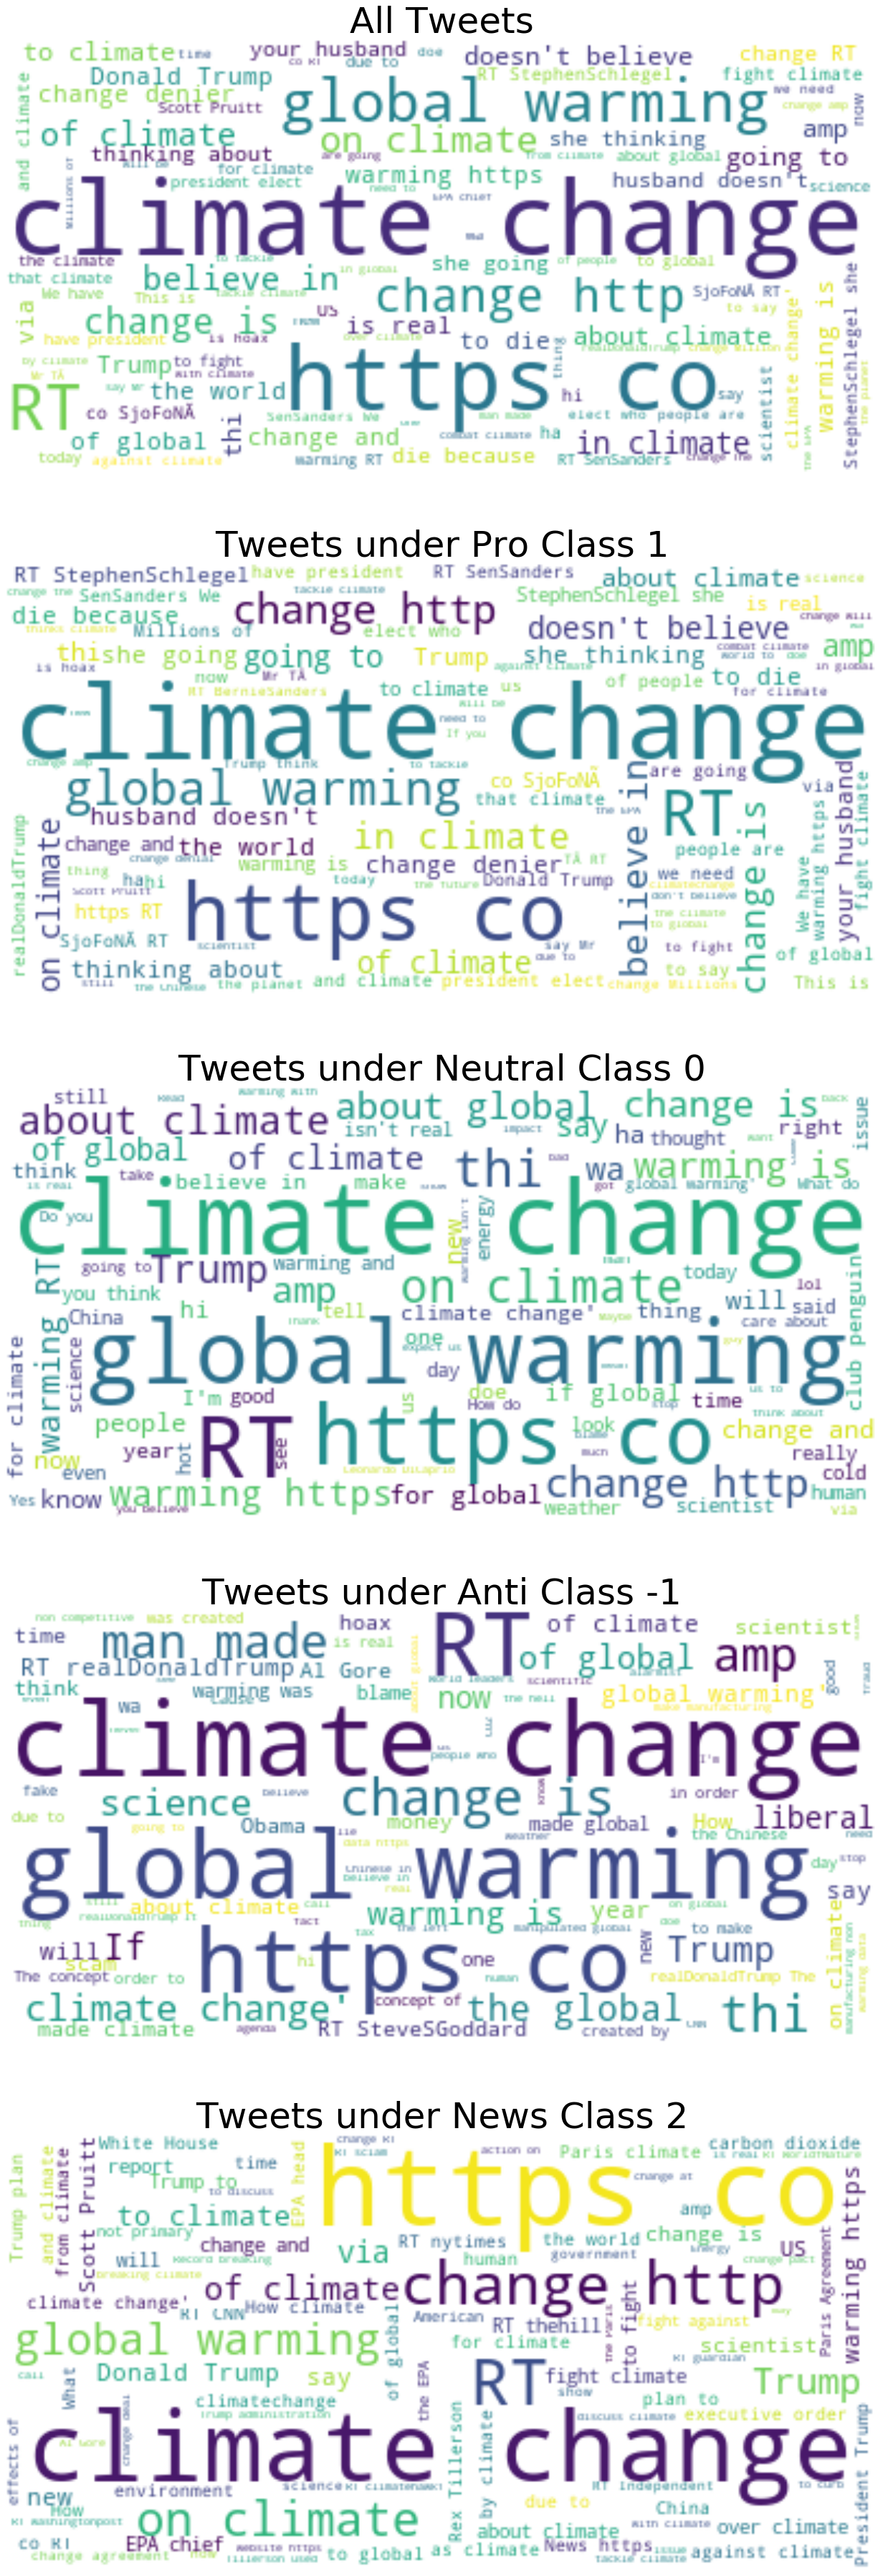

In [26]:
#pd.set_option('display.max_colwidth', 60)
# visualising the messages 
df_senti1 = train_df[train_df['sentiment']==1]
df_senti0 = train_df[train_df['sentiment']==0]
df_senti_neg1 = train_df[train_df['sentiment']==-1]
df_senti2 = train_df[train_df['sentiment']==2]
tweet_All = " ".join(review for review in train_df.message)
tweet_senti1 = " ".join(review for review in df_senti1.message)
tweet_senti0 = " ".join(review for review in df_senti0.message)
tweet_senti_neg1 = " ".join(review for review in df_senti_neg1.message)
tweet_senti2 = " ".join(review for review in df_senti2.message)

fig, ax = plt.subplots(5, 1, figsize  = (65,65))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)
wordcloud_1 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_senti1)
wordcloud_0 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_senti0)
wordcloud_neg1 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_senti_neg1)
wordcloud_2 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_senti2)

# Display the generated image:
ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('All Tweets', fontsize=50)
ax[0].axis('off')
ax[1].imshow(wordcloud_1, interpolation='bilinear')
ax[1].set_title('Tweets under Pro Class 1',fontsize=50)
ax[1].axis('off')
ax[2].imshow(wordcloud_0, interpolation='bilinear')
ax[2].set_title('Tweets under Neutral Class 0',fontsize=50)
ax[2].axis('off')
ax[3].imshow(wordcloud_neg1, interpolation='bilinear')
ax[3].set_title('Tweets under Anti Class -1',fontsize=50)
ax[3].axis('off')
ax[4].imshow(wordcloud_2, interpolation='bilinear')
ax[4].set_title('Tweets under News Class 2',fontsize=50)
ax[4].axis('off')

In [27]:
def jaccard(str1, str2): 
    '''It takes two strings can be two columns fro a df and returns intersection of twe two  divided by thier union'''
    a = set(str1.lower().split()) 
    b = set(str2.lower().split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

In [28]:
# on the train_df
results_jaccard=[]

for ind,row in train_df.iterrows():
    sentence1 = row.message
    sentence2 = row.clean_message

    jaccard_score = jaccard(sentence1,sentence2)
    results_jaccard.append([sentence1,sentence2,jaccard_score])

In [29]:
jaccard = pd.DataFrame(results_jaccard,columns=["message","clean_message","jaccard_score"])
train_df = train_df.merge(jaccard,how='outer')

In [30]:
train_df.head()

sentiment                                            message  tweetid  \
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1          1  It's not like we lack evidence of anthropogeni...   126103   
2          2  RT @RawStory: Researchers say we have three ye...   698562   
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954   

                                   fixed_cntractions  \
0  PolySciMajor EPA chief does not think carbon d...   
1  it has / it is not like we lack evidence of an...   
2  RT @RawStory: Researchers say we have three ye...   
3  #TodayinMaker# WIRED : 2016 was a pivotal year...   
4  RT @SoyNovioDeTodas: it has / it is 2016, and ...   

                                       clean_message  \
0  polyscimajor epa chief does not think carbon d...   
1  it has it is not like we lack evidence of anth...   
2  rt researchers say we have three years to act ...   
3  wired  was a pivotal year in the war on climat...   
4  rt it has it is  and a racist sexist climate c...   

                                         message_POS  \
0  [(polyscimajor, JJ), (epa, NN), (chief, NN), (...   
1  [(it, PRP), (has, VBZ), (it, PRP), (is, VBZ), ...   
2  [(rt, NN), (researchers, NNS), (say, VBP), (we...   
3  [(wired, VBN), (was, VBD), (a, DT), (pivotal, ...   
4  [(rt, NN), (it, PRP), (has, VBZ), (it, PRP), (...   

                                              lemmaa  \
0  polyscimajor epa chief do not think carbon dio...   
1  -PRON- have -PRON- be not like -PRON- lack evi...   
2  rt researcher say -PRON- have three year to ac...   
3  wired   be a pivotal year in the war on climat...   
4  rt -PRON- have -PRON- be   and a racist sexist...   

                                         clean_lemma  \
0  polyscimajor epa chief do not think carbon dio...   
1   have  be not like  lack evidence of anthropog...   
2   researcher say  have three year to act on cli...   
3  wired   be a pivotal year in the war on climat...   
4    have  be   and a racist sexist climate chang...   

                                   tokenized_message  \
0  [polyscimajor, epa, chief, do, not, think, car...   
1  [have, be, not, like, lack, evidence, of, anth...   
2  [researcher, say, have, three, year, to, act, ...   
3  [wired, be, a, pivotal, year, in, the, war, on...   
4  [have, be, and, a, racist, sexist, climate, ch...   

                                     clean_stp_words  Num_words_raw  \
0  [polyscimajor, epa, chief, not, think, carbon,...             19   
1  [not, like, lack, evidence, anthropogenic, glo...             10   
2  [researcher, say, three, year, act, climate, c...             19   
3       [wired, pivotal, year, war, climate, change]             15   
4  [racist, sexist, climate, change, deny, bigot,...             18   

   Num_words_clean  difference_in_wordsNo  jaccard_score  
0               13                      6       0.541667  
1                7                      3       0.692308  
2                8                     11       0.714286  
3                6                      9       0.733333  
4                8                     10       0.478261

kdeplot for Num_words_raw and Num_words_clean

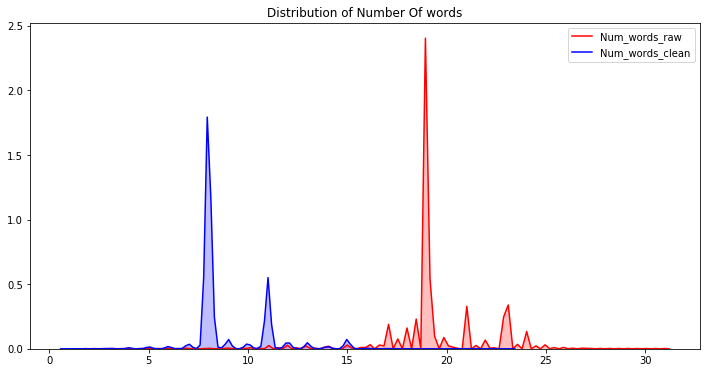

In [31]:
plt.figure(figsize=(12,6))
p1=sns.kdeplot(train_df['Num_words_raw'], shade=True, color="r").set_title('Distribution of Number Of words')
p2=sns.kdeplot(train_df['Num_words_clean'], shade=True, color="b")

#### Checking the differnce in number of words and jaccard_scores across different Sentiments

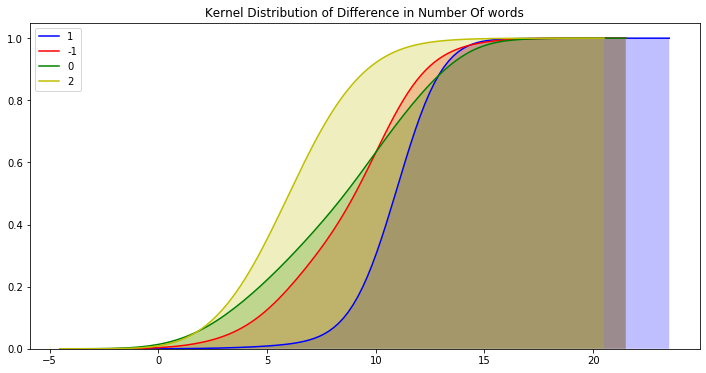

In [32]:
plt.figure(figsize=(12,6))
p1=sns.kdeplot(train_df[train_df['sentiment']== 1]['difference_in_wordsNo'], shade=True,cumulative=True, bw=1.5, color="b").set_title('Kernel Distribution of Difference in Number Of words')
p2=sns.kdeplot(train_df[train_df['sentiment']== -1]['difference_in_wordsNo'], shade=True,cumulative=True, bw=1.5, color="r")
p3=sns.kdeplot(train_df[train_df['sentiment']== 0]['difference_in_wordsNo'], shade=True, cumulative=True, bw=1.5, color="g")
p4=sns.kdeplot(train_df[train_df['sentiment']== 2]['difference_in_wordsNo'], shade=True, cumulative=True, bw=1.5, color="y")
plt.legend(labels=[1, -1, 0, 2])

### Most Common words in message 

### raw message

In [33]:
train_df['temp_list'] = train_df['message'].apply(lambda x:str(x).split())
top = Counter([item for sublist in train_df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

In [34]:
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Raw message', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

### Clean messages

In [35]:
train_df['temp_list0'] = train_df['clean_stp_words']
top = Counter([item for sublist in train_df['temp_list0'] for item in sublist])
temp0 = pd.DataFrame(top.most_common(20))
temp0.columns = ['Common_words','count']
temp0.style.background_gradient(cmap='Greens')

In [36]:
fig = px.bar(temp0, x="count", y="Common_words", title='Commmon Words in cleaned message', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

with stop words removed, now the most common word is climate 

## Most common words sentiment wise in raw message

In [37]:
Pro = train_df[train_df['sentiment']==1]
Anti = train_df[train_df['sentiment']== -1]
Neutral = train_df[train_df['sentiment']==0]
News = train_df[train_df['sentiment']== 2]

In [38]:
#MosT common positive words(Pro)
top = Counter([item for sublist in Pro['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

In [39]:
#MosT common negative words(Anti)
top = Counter([item for sublist in Anti['temp_list'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative = temp_negative.iloc[1:,:]
temp_negative.columns = ['Common_words','count']
temp_negative.style.background_gradient(cmap='Reds')

In [40]:
#MosT common words in Neutral sentiment
top = Counter([item for sublist in Neutral['temp_list'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(20))
temp_neutral = temp_neutral.loc[1:,:]
temp_neutral.columns = ['Common_words','count']
temp_neutral.style.background_gradient(cmap='Reds')

In [41]:
#MosT common words in News sentiment
top = Counter([item for sublist in News['temp_list'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(20))
temp_neutral = temp_neutral.loc[1:,:]
temp_neutral.columns = ['Common_words','count']
temp_neutral.style.background_gradient(cmap='Reds')

Clean messages sentiment wise 

Visuals for nomber of clean message and raw with thier diffences and jaccard score.

### Below is modeling of the data

SUPPORT VECTOR MACHINES AND MODEL TUNING

In [122]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

In [123]:
def detokenization(text):
    '''counter slpit the message into taken of words'''
    text = TreebankWordDetokenizer().detokenize(text)
    return text
train_df['detokenized'] = train_df['clean_stp_words'].apply(lambda x: detokenization(x))
test_df['detokenized'] = test_df['clean_stp_words'].apply(lambda x: detokenization(x))

### Building pipelines to vectorize the data, then train and fit a model

In [124]:
# Linear SVC:
text_clf_lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

### Training on raw data

In [132]:
# defing the x and y varible
X= train_df['clean_message']
y=train_df['sentiment']
# slpitting the X and y into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Linear SVC:
text_clf_lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])
text_clf_lsvc.fit(X_train, y_train)
# Form a prediction set
predictions = text_clf_lsvc.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))
# Print a classification report
print(metrics.classification_report(y_test,predictions))

[[  289    32   101    12]
 [   16   410   223    44]
 [   29    83 27855   145]
 [    5    20   163   632]]
              precision    recall  f1-score   support

          -1       0.85      0.67      0.75       434
           0       0.75      0.59      0.66       693
           1       0.98      0.99      0.99     28112
           2       0.76      0.77      0.76       820

    accuracy                           0.97     30059
   macro avg       0.84      0.75      0.79     30059
weighted avg       0.97      0.97      0.97     30059



In [133]:
# on the test set
X_test = test_df['message']
# Form a prediction set
raw_pred = text_clf_lsvc.predict(X_test)
# Donverting the predictions to dataframe
raw_pred = pd.DataFrame(data=raw_pred,
                                 columns=['sentiment'],
                                 index=test_df['tweetid'])
raw_pred.reset_index(inplace=True)
raw_pred.to_csv(r"C:\Users\elton\Documents\Jm_team\Classification_Predict_Package\predictions_SVC\SCV_raw_pred.csv", index=False)

### Training on column clean_message

In [134]:
# defing the x and y varible
X= train_df['clean_message']
y=train_df['sentiment']
# slpitting the X and y into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Linear SVC:
text_clf_lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])
text_clf_lsvc.fit(X_train, y_train)
# Form a prediction set
predictions = text_clf_lsvc.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))
# Print a classification report
print(metrics.classification_report(y_test,predictions))

[[  289    32   101    12]
 [   16   410   223    44]
 [   29    83 27855   145]
 [    5    20   163   632]]
              precision    recall  f1-score   support

          -1       0.85      0.67      0.75       434
           0       0.75      0.59      0.66       693
           1       0.98      0.99      0.99     28112
           2       0.76      0.77      0.76       820

    accuracy                           0.97     30059
   macro avg       0.84      0.75      0.79     30059
weighted avg       0.97      0.97      0.97     30059



In [135]:
# on the test set
X_test = test_df['clean_message']
# Form a prediction set
cln_pred = text_clf_lsvc.predict(X_test)
# Donverting the predictions to dataframe
cln_pred = pd.DataFrame(data=cln_pred,
                                 columns=['sentiment'],
                                 index=test_df['tweetid'])
cln_pred.reset_index(inplace=True)
cln_pred.to_csv(r"C:\Users\elton\Documents\Jm_team\Classification_Predict_Package\predictions_SVC\SCV_clean_msg_pred.csv", index=False)

### Training on final cleaned detokenized message

In [136]:
# defing the x and y varible
X= train_df['detokenized']
y=train_df['sentiment']
# slpitting the X and y into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Feeding the training data through the Linear SVC pipeline
text_clf_lsvc.fit(X_train, y_train)
# Form a prediction set
dtknz_pred = text_clf_lsvc.predict(X_test)
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,dtknz_pred))
# Print a classification report
print(metrics.classification_report(y_test,dtknz_pred))

[[  292    26    94    22]
 [   22   395   233    43]
 [   31    85 27839   157]
 [    3    23   174   620]]
              precision    recall  f1-score   support

          -1       0.84      0.67      0.75       434
           0       0.75      0.57      0.65       693
           1       0.98      0.99      0.99     28112
           2       0.74      0.76      0.75       820

    accuracy                           0.97     30059
   macro avg       0.83      0.75      0.78     30059
weighted avg       0.97      0.97      0.97     30059



In [142]:
# on the test set
X_test = test_df['detokenized']
# Form a prediction set
dtkz_pred = text_clf_lsvc.predict(X_test)
# Converting the predictions to dataframe
dtkz_pred = pd.DataFrame(data=dtkz_pred,
                                 columns=['sentiment'],
                                 index=test_df['tweetid'])
dtkz_pred.reset_index(inplace=True)
dtkz_pred.to_csv(r"C:\Users\elton\Documents\Jm_team\Classification_Predict_Package\predictions_SVC\SVC_dtkz_pred.csv", index=False)